<a href="https://colab.research.google.com/github/natka67/PUM/blob/main/credit_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
#df_train.drop(columns = ['SSN', 'ID', 'Customer_ID'], inplace = True )
print('Train data: ', df_train.shape)
df_train.drop_duplicates(subset="ID", inplace=True)
print('Train data without duplicates: ', df_train.shape)
print('Test data: ',df_test.shape)

/var/folders/h4/pdn3pcp16vxc0wjz5jwhfhm40000gn/T/ipykernel_10479/2954131301.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train.csv')


Train data:  (100000, 28)
Train data without duplicates:  (100000, 28)
Test data:  (50000, 27)


In [ ]:
df_train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [ ]:
df_train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [ ]:
categorical_to_numbers = ['Month', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
numeric_columns = ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
                   'Interest_Rate', 'Num_of_Loan',
                   'Num_of_Delayed_Payment',
                   'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance',
                   'Changed_Credit_Limit']

for column in numeric_columns:
  print(column)
  df_train[column] = df_train[column].astype(str)
  df_train[column] = df_train[column].str.replace('_', '')
  if column == 'Changed_Credit_Limit':
    df_train[column] = df_train[column].replace('', np.nan)
  df_train[column] = df_train[column].astype(float)
  #df_train[column] = df_train[column].fillna(df_train[column].mean())
numeric_columns = df_train.select_dtypes(include=['float']).columns.tolist()
#df_train[numeric_columns] = df_train[numeric_columns].apply(pd.to_numeric)

Age
Annual_Income
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Num_of_Loan
Num_of_Delayed_Payment
Outstanding_Debt
Amount_invested_monthly
Monthly_Balance
Changed_Credit_Limit


In [ ]:
def convert_to_months(value):
    parts = str(value).split(' ')
    years = float(parts[0])
    months = float(parts[3]) if len(parts) > 3 else 0
    return 12*years+months
df_train['Credit_History_Age'] = df_train['Credit_History_Age'].apply(convert_to_months)

In [ ]:
numeric_columns

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [ ]:
"""import numpy as np

def replace_nulls_and_outliers_with_iqr(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        min_val = Q1 - 1.5 * IQR
        max_val = Q3 + 1.5 * IQRx

        valid_values = df[col][(df[col] >= min_val) & (df[col] <= max_val)]
        mean_value = valid_values.mean() if not valid_values.empty else None
        df.loc[(df[col] < min_val) | (df[col] > max_val), col] = mean_value
        df[col].fillna(mean_value, inplace=True)

        print(col, df.shape[0], valid_values.shape[0], mean_value)
    return df

df_train  = replace_nulls_and_outliers_with_iqr(df_train)
"""

'import numpy as np\n\ndef replace_nulls_and_outliers_with_iqr(df):\n    for col in df.select_dtypes(include=[np.number]).columns:\n        Q1 = df[col].quantile(0.25)\n        Q3 = df[col].quantile(0.75)\n        IQR = Q3 - Q1\n        \n        min_val = Q1 - 1.5 * IQR\n        max_val = Q3 + 1.5 * IQRx\n        \n        valid_values = df[col][(df[col] >= min_val) & (df[col] <= max_val)]\n        mean_value = valid_values.mean() if not valid_values.empty else None\n        df.loc[(df[col] < min_val) | (df[col] > max_val), col] = mean_value\n        df[col].fillna(mean_value, inplace=True)\n        \n        print(col, df.shape[0], valid_values.shape[0], mean_value)\n    return df\n\ndf_train  = replace_nulls_and_outliers_with_iqr(df_train)\n'

In [ ]:
def replace_nulls_and_outliers(df):
    # Define the columns and their respective ranges for filtering
    ranges = {
        'Age': (0, 110),
        'Annual_Income': (0, np.inf),
        'Num_Bank_Accounts': (0, 11),
        'Num_Credit_Card': (0, 20),
        'Num_of_Loan': (0, 30),
        'Num_of_Delayed_Payment': (0, 30),
        'Outstanding_Debt': (0, np.inf),
        'Amount_invested_monthly': (0, 4000),
        'Monthly_Balance': (0, np.inf),
        'Interest_Rate': (0, 100),
        'Credit_History_Age': (0, np.inf),
        'Credit_Utilization_Ratio': (0, np.inf),
        'Monthly_Inhand_Salary': (0, np.inf),
        'Num_Credit_Inquiries': (0, 100),
        'Total_EMI_per_month': (0, 200000),
        'Changed_Credit_Limit': (-1000, 1000)
    }

    for col, (min_val, max_val) in ranges.items():
        # Calculate mode for categorical columns within the specified range
        valid_values = df[col][(df[col] >= min_val) & (df[col] <= max_val)]
        mean_value = valid_values.mean() if not valid_values.empty else None
        print(col, df.shape[0], valid_values.shape[0], mean_value)

        df.loc[(df[col] < min_val) | (df[col] > max_val), col] = mean_value
        df[col].fillna(mean_value, inplace=True)

    return df

df_train = replace_nulls_and_outliers(df_train)

Age 100000 97226 33.32475880937198
Annual_Income 100000 100000 176415.70129814997
Num_Bank_Accounts 100000 98664 5.368979567015325
Num_Credit_Card 100000 97737 5.5342193846751995
Num_of_Loan 100000 95659 3.5351299929959543
Num_of_Delayed_Payment 100000 91618 13.419633696435199
Outstanding_Debt 100000 100000 1426.220376
Amount_invested_monthly 100000 91216 195.53945602655264
Monthly_Balance 100000 98791 402.5512581105154
Interest_Rate 100000 97988 14.546679185206353
Credit_History_Age 100000 90970 221.19540507859733
Credit_Utilization_Ratio 100000 100000 32.2851725189436
Monthly_Inhand_Salary 100000 84998 4194.170849600524
Num_Credit_Inquiries 100000 96433 5.807068119834496
Total_EMI_per_month 100000 100000 1403.1182166159933
Changed_Credit_Limit 100000 97909 10.389025115157953


<Axes: xlabel='Changed_Credit_Limit', ylabel='Count'>

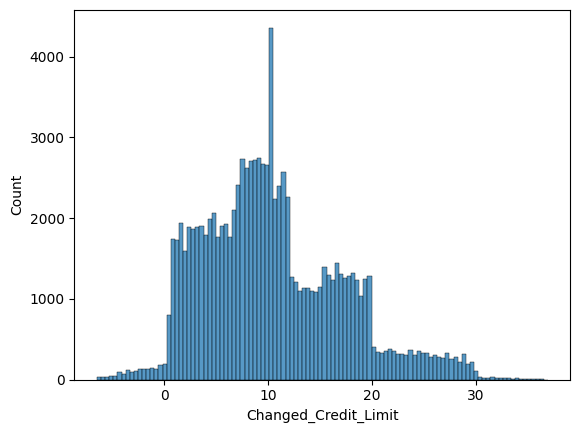

In [ ]:
sns.histplot(data=df_train[df_train['Changed_Credit_Limit']>=-7], x = 'Changed_Credit_Limit')

In [ ]:
df_train.drop(columns=['ID','Customer_ID','Name', 'SSN'],inplace=True)

In [ ]:
for column in df_train.columns:
  print(column, ": ", sum(df_train[column].isnull()))

Month :  0
Age :  0
Occupation :  0
Annual_Income :  0
Monthly_Inhand_Salary :  0
Num_Bank_Accounts :  0
Num_Credit_Card :  0
Interest_Rate :  0
Num_of_Loan :  0
Type_of_Loan :  11408
Delay_from_due_date :  0
Num_of_Delayed_Payment :  0
Changed_Credit_Limit :  0
Num_Credit_Inquiries :  0
Credit_Mix :  0
Outstanding_Debt :  0
Credit_Utilization_Ratio :  0
Credit_History_Age :  0
Payment_of_Min_Amount :  0
Total_EMI_per_month :  0
Amount_invested_monthly :  0
Payment_Behaviour :  0
Monthly_Balance :  0
Credit_Score :  0


In [ ]:
df_train['Type_of_Loan'].value_counts()

Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, M

In [ ]:
unique_loan_types = set()
df_train['Type_of_Loan'].fillna('Not Specified', inplace=True)

for loan_combo in df_train['Type_of_Loan']:

    if pd.notna(loan_combo):

        loans = loan_combo.split(', ')
        loans = [l.replace("and ", '') for l in loans]
        # Add each loan to the set of unique loan types
        unique_loan_types.update(loans)


unique_loan_types
for loan_type in list(unique_loan_types):
    df_train[loan_type] = df_train['Type_of_Loan'].apply(lambda x: 1 if loan_type in x else 0)
df_train.drop('Type_of_Loan', inplace=True, axis=1)

In [ ]:
scaler = MinMaxScaler()

mm_scalers = {}
for column in numeric_columns:
    mm_scalers[column] = MinMaxScaler()
    df_train[column] = mm_scalers[column].fit_transform(df_train[column].values.reshape(-1, 1))

In [ ]:
categorical_col = ['Month', 'Occupation',  'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

for column in categorical_col:
  print(column, ": ", len(df_train[column].unique()))

from sklearn.preprocessing import LabelEncoder

categorical_col = ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

label_encoders = {}
for column in categorical_col:
    label_encoders[column] = LabelEncoder()
    df_train[column] = label_encoders[column].fit_transform(df_train[column])


Month :  8
Occupation :  16
Credit_Mix :  4
Payment_of_Min_Amount :  3
Payment_Behaviour :  7
Credit_Score :  3


In [ ]:
df_train.dtypes

Month                         int64
Age                         float64
Occupation                    int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int64
Monthly_Balance             float64
Credit_Score                  int64
Auto Loan                     int64
Home Equity Loan              int64
Credit-Builder Loan           int64
Personal Loan                 int64
Payday Loan                 

In [ ]:
df_train

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Score,Auto Loan,Home Equity Loan,Credit-Builder Loan,Personal Loan,Payday Loan,Mortgage Loan,Student Loan,Not Specified,Debt Consolidation Loan
0,3,0.094737,12,0.000501,0.102087,0.272727,0.2,0.020202,0.137931,3,...,0,1,1,1,1,0,0,0,0,0
1,2,0.094737,12,0.000501,0.261092,0.272727,0.2,0.020202,0.137931,-1,...,0,1,1,1,1,0,0,0,0,0
2,6,0.203419,12,0.000501,0.261092,0.272727,0.2,0.020202,0.137931,3,...,0,1,1,1,1,0,0,0,0,0
3,0,0.094737,12,0.000501,0.261092,0.272727,0.2,0.020202,0.137931,5,...,0,1,1,1,1,0,0,0,0,0
4,7,0.094737,12,0.000501,0.102087,0.272727,0.2,0.020202,0.137931,6,...,0,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0.115789,9,0.001349,0.205072,0.363636,0.3,0.060606,0.068966,23,...,1,1,0,0,0,0,0,1,0,0
99996,7,0.115789,9,0.001349,0.205072,0.363636,0.3,0.060606,0.068966,18,...,1,1,0,0,0,0,0,1,0,0
99997,5,0.115789,9,0.001349,0.205072,0.363636,0.3,0.136835,0.068966,27,...,1,1,0,0,0,0,0,1,0,0
99998,4,0.115789,9,0.001349,0.205072,0.363636,0.3,0.060606,0.068966,20,...,2,1,0,0,0,0,0,1,0,0
